Hi.

This is an apartment on sale data downloaded from https://www.halooglasi.com/ . Data was downloaded in late summer in August 2019., so it is outdated and it's only used for fun and data analysis.
    
In the future, I plan to buy an apartment, and that's why I decided to explore (done in Belgrade apartments part 1). 
I used this data to practice a few machine learning algorithms for predicting Price, given the data about the apartment in Belgrade (done in Belgrade apartments part 2).

In [1]:
import pandas as pd
import numpy as np
import sqlite3

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
dat = sqlite3.connect('C:/Users/User/Desktop/Case Study Belgrade appartmants/apartments-sale-total.sqlite')

In [3]:
data=pd.read_sql_query('select * from apartments', dat)

In [4]:
data.head()

,id,accommodation_type,address,advertiser,city,description,location,municipality,number_of_rooms,price,...,balcony,intercom,lift,parking,telephone,internet,katv,garage,basement,loggia
0,1,Stan,Bulevar Mihajla Pupina,Agencija,Beograd,Stan se nalazi u Bloku 30 i pozicioniran je bl...,Blok 30 (B92),Opština Novi Beograd,2,119,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,None
1,2,Stan,Antifašističke borbe,Agencija,Beograd,Stan na odličnoj lokaciji. Nalazi se u Bloku 2...,Blok 22,Opština Novi Beograd,2,149.5,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,None
2,3,Stan,Jurija Gagarina,Agencija,Beograd,"Dvosoban stan u Belvilu od 60m2 sa terasom, 5/...",Blok 67 (Belvil),Opština Novi Beograd,2,136,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,None
3,4,Stan,Uroša Martinovića,Agencija,Beograd,U prilici smo da vam ponudimo stan u novom nas...,Blok 67a (A blok),Opština Novi Beograd,3,205,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,None
4,5,Stan,Katićeva,Agencija,Beograd,Stan na odličnoj lokaciji. Kompletno renoviran...,Centar,Opština Savski venac,3.5,245,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,None


In [5]:
data.columns

Index(['id', 'accommodation_type', 'address', 'advertiser', 'city',
       'description', 'location', 'municipality', 'number_of_rooms', 'price',
       'publish_date', 'size', 'advertisement_id', 'advertisement_url',
       'heating', 'floor', 'total_number_of_floors', 'object_type', 'filed',
       'pdv_return', 'balcony', 'intercom', 'lift', 'parking', 'telephone',
       'internet', 'katv', 'garage', 'basement', 'loggia'],
      dtype='object')

In [6]:
print(data.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [7]:
# How many intiger, float and ordinal featres?
print('Number of integer features: ', len(data.select_dtypes(include=['int64']).columns))
print('Number of ordinar features: ', len(data.select_dtypes(include=['O']).columns))
print('Number of float features: ', len(data.select_dtypes(include=['float64']).columns))

Number of integer features:  1
Number of ordinar features:  17
Number of float features:  12


In [8]:
print(data.select_dtypes(include=['int64']).columns)
print(data.select_dtypes(include=['O']).columns)
print(data.select_dtypes(include=['float64']).columns)

Index(['id'], dtype='object')
Index(['accommodation_type', 'address', 'advertiser', 'city', 'description',
       'location', 'municipality', 'number_of_rooms', 'price', 'publish_date',
       'size', 'advertisement_id', 'advertisement_url', 'heating', 'floor',
       'object_type', 'loggia'],
      dtype='object')
Index(['total_number_of_floors', 'filed', 'pdv_return', 'balcony', 'intercom',
       'lift', 'parking', 'telephone', 'internet', 'katv', 'garage',
       'basement'],
      dtype='object')


In [9]:
data.isnull().sum()

id                            0
accommodation_type            0
address                       0
advertiser                    0
city                          0
description                   0
location                      0
municipality                  0
number_of_rooms               0
price                         0
publish_date                  0
size                          0
advertisement_id              0
advertisement_url             0
heating                     778
floor                       423
total_number_of_floors      975
object_type                5934
filed                      5012
pdv_return                17727
balcony                    9403
intercom                  18255
lift                      10782
parking                   14279
telephone                 10205
internet                  12943
katv                      12668
garage                    16643
basement                  14058
loggia                    18256
dtype: int64

In [10]:
for col in data.columns:
    print('Unique number of {}: '.format(col), data[col].unique())

Unique number of id:  [    1     2     3 ... 18254 18255 18256]
Unique number of accommodation_type:  ['Stan']
Unique number of address:  ['Bulevar Mihajla Pupina' 'Antifašističke borbe' 'Jurija Gagarina' ...
 'Santiceva' 'ARCADIA 1609' 'METROPOLITAN B802']
Unique number of advertiser:  ['Agencija' 'Investitor' 'Vlasnik' 'Banka']
Unique number of city:  ['Beograd']
Unique number of description:  ['Stan se nalazi u Bloku 30 i pozicioniran je bliže gradu, na uglu sa ulicom Španskih boraca. Po strukturi dvosoban ali adaptiran u dvoiposoban....'
 'Stan na odličnoj lokaciji. Nalazi se u Bloku 22 na Novom Beogradu. Po strukturi dvosoban, dve terase. Uknjižen. Za preporuku. Agencijska provizija...'
 'Dvosoban stan u Belvilu od 60m2 sa terasom, 5/10 sprat lift, cg, zapadno orijentisan, za preporuku! agencijska provizija 2% ,'
 ...
 'Luksuzan petosoban stan u kući na Dedinju u blizini Belog Dvora i Kraljevskog Kompleksa. Kuća se sastoji od četiri velika stana koji imaju zasebne...'
 'Trosobana 

From all of the above, it can be seen that data is very messy. Types are wrong, and there is a lot of missing data. Accomodation_type is always 'stan' (= apartment) and the city is always 'Belgrade'. Loggia is always null. These columns can be deleted as they are not carrying information that can change a buyer's opinion.

Searching for an attractive offer.

**Adjusting price and the rest of the messy data**

In [11]:
def remove_commas_and_dots(x):
    '''
    Removes string sings (commas and dots) from values and put them in float type.
    '''

    for i in range(0,len(x)):
        if type(x[i])== str:
            if ',' in x[i]:
                x[i]=float(x[i].replace(',',''))
            elif '.' in x[i] and len(x[i])==9:
                x[i]=float(x[i].replace('.',''))
    return x  

In [12]:
# For check - is everything is OK after the price adjustment
print(type(data.price[88]))
print(data.price[94])

<class 'str'>
1.000.000


In [13]:
%timeit data.price=remove_commas_and_dots(data.price)

The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
341 ms ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
print(type(data.price[88]))
print(data.price[94])

<class 'float'>
1000000.0


Now, it seems OK, let's just check if there are string values. Price and size should be of type float.

In [15]:
# checking for string values
def check_for_strings(x):
    '''
    Chechking if there is a string value in a column.
    '''
    for i in range(0,len(x)):
        if type(x[i]) == str:
            print(x[i])
            return i, x[i]

In [16]:
# If there is no output, there is no string value
%timeit check_for_strings(data.price)

300 ms ± 55.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# Making sure that every value is of type float
data.price=data.price.astype(float)

In [18]:
# For 'size' column
def replace_comma_with_dot(x):
    '''
    Replaces commas with dots and put them in float type.
    '''

    for i in range(0,len(x)):

        if type(x[i])== str:
             if ',' in x[i]:
                x[i]=float(x[i].replace(',','.'))

    return x

In [19]:
%timeit data['size']=replace_comma_with_dot(data['size'])

568 ms ± 80 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# Making sure that every value is float type
data['size']=data['size'].astype(float)

In [21]:
def adjusting_m2(x):
    '''
    Adjusting prices by multiplying price per m2 with size of appartment
    (for all values less than 4).
    '''
    for i in range(0, len(x)):
        if x[i]<4:
            #print(x[i],data['size'][i] )
            x[i]=x[i]*data['size'][i]
    return x

In [22]:
%timeit data.price=adjusting_m2(data.price)

334 ms ± 84.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
# All prices are marked in the unit of thousands of EURs, let's show the full price by multiplying with 1000
# For prices that are under 850k and 'size' under 100m2
data.price = [data.price[i]*1000 if (data.price[i]<850 and data['size'][i]<100) else data.price[i] for i in range(0, len(data.price))]

In [24]:
# For prices that are under 1000k and 'size' more than 100m2
data.price = [data.price[i]*1000 if (data.price[i]<1000 and data['size'][i]>=100) else data.price[i] for i in range(0, len(data.price))]

In [25]:
data.price.sort_values().head(20)

3280      850.0
10211     850.0
10208     850.0
14543     850.0
10210     850.0
10212     850.0
10209     850.0
79        950.0
10874     950.0
11350     950.0
4923      950.0
11882     950.0
11874     950.0
11876     950.0
1710      990.0
122      1200.0
11348    1690.0
13476    2000.0
16803    2000.0
97       2633.0
Name: price, dtype: float64

In [26]:
# There are still values that need to be adjusted manually

print(data.advertisement_url[3280])
print(data.advertisement_url[10211])
print(data.advertisement_url[10208])
print(data.advertisement_url[14543])
print(data.advertisement_url[10210])
print(data.advertisement_url[10212])
print(data.advertisement_url[10209])
print(data.advertisement_url[79])
print(data.advertisement_url[10874])
print(data.advertisement_url[11350])
print(data.advertisement_url[4923])
print(data.advertisement_url[11882])
print(data.advertisement_url[11874])
print(data.advertisement_url[11876])
print(data.advertisement_url[1710])
print(data.advertisement_url[122])
print(data.advertisement_url[11348])
print(data.advertisement_url[13476])
print(data.advertisement_url[16803])
print(data.advertisement_url[97])

https://www.halooglasi.com/nekretnine/prodaja-stanova/uknjizeni--odmah-useljivi-stanovi-moze-na-kre/5425444586903?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/dvoiposoban-stan-u-borci-novogradnja-sf-551/5425634604156?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/palilula-sf554/5425634604153?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/prodaja-stanova-u-legalizovanoj-zgradi-u-lest/5425634587298?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/palilula-sf556/5425634604155?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/palilula-sf552/5425634604157?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/palilula-sf-555/5425634604154?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/novogradnja-borca-lux-stanovi/5425634935389?kid=4
https://www.halooglasi.com/nekretnine/prodaja-stanova/akcija-direktna-prodaja-stanova/5425634629139?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/veliki-mokri-lug-od-0

In [27]:
data['size'].sort_values().head()

18006    1.0
11857    1.0
16094    1.2
15394    2.6
8682     7.0
Name: size, dtype: float64

In [28]:
print(data.advertisement_url[18006])
print(data.advertisement_url[11857])
print(data.advertisement_url[16094])
print(data.advertisement_url[15394])

https://www.halooglasi.com/nekretnine/prodaja-stanova/hostel-na-elitnom-mestu-id100691/5425634753521?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/trebinjska-lekino-brdo-vozdovac-beograd-srbij/5425634830930?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/vozdovac-medakovic-mokroluska-20-0-1200m2/5425481445172?kid=1
https://www.halooglasi.com/nekretnine/prodaja-stanova/kod-hrama-2600m2/3778321?kid=1


In [29]:
# Adjusting 'size' values
data['size'][18006]=1000
data['size'][11857]=1000
data['size'][16094]=1200
data['size'][15394]=2600
data['size'][8682]=70

In [30]:
# It is not uncommon to show price per km2 in advertisements, 
# especially if the full price is very high. 
# These prices will multiply with the corresponding apartment sizes.

def adjusting_m2(x):
    '''
    Adjusting prices by multiplying the price per m2 with a size of the apartment
    (For all values less than 2700EUR).
    '''
    for i in range(0, len(x)):
        if x[i]<2700:
            #print(x[i],data['size'][i] )
            x[i]=x[i]*data['size'][i]
    return x

In [31]:
%timeit data.price=adjusting_m2(data.price)

295 ms ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Next cells are for detecting and adjusting prices that are skipped or wrongly populated.

In [32]:
# This is an average price check per m2
price_per_m2=(data.price)/(data['size'])

In [33]:
price_per_m2.sort_values(ascending=False).head(10)

123      23529.411765
494      20000.000000
16703    14285.714286
6159     13734.693878
14155    12126.984127
9658     11818.181818
15066    11538.461538
15703    11320.754717
9659     10833.333333
1204      8697.056604
dtype: float64

In [34]:
print(data.price[123], data['size'][123], data.advertisement_url[123])
print(data.price[494], data['size'][494], data.advertisement_url[494])
print(data.price[16703], data['size'][16703], data.advertisement_url[16703])
print(data.price[6159], data['size'][6159], data.advertisement_url[6159])
print(data.price[14155], data['size'][14155], data.advertisement_url[14155])
print(data.price[9658], data['size'][9658], data.advertisement_url[9658])
print(data.price[15066], data['size'][15066], data.advertisement_url[15066])
print(data.price[15703], data['size'][15703], data.advertisement_url[15703])
print(data.price[9659], data['size'][9659], data.advertisement_url[9659])
print(data.price[1204], data['size'][1204], data.advertisement_url[1204])


800000.0 34.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/uknjizeno-useljivo-moze-na-kredit-banke/5425634305458?kid=4
800000.0 40.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/direktna-prodaja-useljivih-stanova/5425616558181?kid=3
1000000.0 70.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/hitno-potreban-lokal-na-boljim-lokacijama-do/5425634815012?kid=1
673000.0 49.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/palilula-sf-860/5425634728236?kid=1
764000.0 63.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/zvezdara-zvezdarska-suma-lokrumska-2-5-63m2/5425634704093?kid=1
650000.0 55.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/kljuc-u-ruke/5425628766956?kid=1
750000.0 65.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/podaju-se-uknjizeni-stanovi-u-kaludjerici/5425634343644?kid=1
600000.0 53.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/grocka-sf-933/5425634762005?kid=1
650000.0 60.0 https://www.halooglasi.com/nekre

In [35]:
# Manually replacing all values that are not correct

data.price[123]=data.price[123]/1000*data['size'][123]
data.price[494]=data.price[494]/1000*data['size'][494]
data.price[6159] =30000
data.price[14155]=76400
data.price[9658]=65000
data.price[9659]=65000
data.price[15066]=data.price[15066]/1000*data['size'][15066]
data.price[15703]=data.price[15703]/1000*data['size'][15703]

In [36]:
# This is an average price check per m2
price_per_m2=(data.price)/(data['size'])

In [37]:
price_per_m2.sort_values(ascending=False).head(10)

16703    14285.714286
1204      8697.056604
18218     8152.467153
8587      8027.245283
8582      8017.811321
18216     7949.560284
10757     7877.890110
11098     7781.333333
13180     7758.567901
11784     7758.567901
dtype: float64

In [38]:
print(data.price[1204], data['size'][1204], data.advertisement_url[1204])
print(data.price[18218], data['size'][18218], data.advertisement_url[18218])
print(data.price[8587], data['size'][8587], data.advertisement_url[8587])
print(data.price[8582], data['size'][8582], data.advertisement_url[8582])
print(data.price[18216], data['size'][18216], data.advertisement_url[18216])
print(data.price[10757], data['size'][10757], data.advertisement_url[10757])
print(data.price[11098], data['size'][11098], data.advertisement_url[11098])
print(data.price[13180], data['size'][13180], data.advertisement_url[13180])
print(data.price[11784], data['size'][11784], data.advertisement_url[11784])


921888.0 106.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-1408---bez-provizije-kup/5425634480246?kid=1
1116888.0 137.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-1605---bez-provizije-kup/5425625810665?kid=1
850888.0 106.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-1403---bez-provizije-kup/5425493030513?kid=1
849888.0 106.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-1404---bez-provizije-kup/5425626243820?kid=1
1120888.0 141.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-1606---bez-provizije-kup/5425435275093?kid=1
716888.0 91.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-3407---bez-provizije-kup/5425634328043?kid=1
1213888.0 156.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/beograd-na-vodi-kula-1604---bez-provizije-kup/5425452658603?kid=1
1256888.0 162.0 https://www.halooglasi.com/nekretnine

In [39]:
price_per_m2.sort_values(ascending=True).head(10)

17023     67.741935
16988    129.482072
3685     132.500000
12067    141.935484
11329    214.285714
15862    217.647059
3668     242.105263
4709     250.000000
3688     250.000000
15856    273.437500
dtype: float64

In [40]:
print(data.price[123], data['size'][123], data.advertisement_url[123])
print(data.price[15703], data['size'][15703], data.advertisement_url[15703])
print(data.price[494], data['size'][494], data.advertisement_url[494])
print(data.price[15066], data['size'][15066], data.advertisement_url[15066])
print(data.price[17023], data['size'][17023], data.advertisement_url[17023])

27200.0 34.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/uknjizeno-useljivo-moze-na-kredit-banke/5425634305458?kid=4
31800.0 53.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/grocka-sf-933/5425634762005?kid=1
32000.0 40.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/direktna-prodaja-useljivih-stanova/5425616558181?kid=3
48750.0 65.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/podaju-se-uknjizeni-stanovi-u-kaludjerici/5425634343644?kid=1
21000.0 310.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/guncati-hajduk-veljkova/5425634812117?kid=1


In [41]:
#data.price[123] = 800*data['size'][123]
#data.price[15703] = 600*data['size'][15703]
#data.price[494] = 800*data['size'][494]
#data.price[15066] = 750*data['size'][15066]

In [42]:
data.price.describe()

count    1.825600e+04
mean     1.217347e+05
std      1.067103e+05
min      6.500000e+03
25%      6.000000e+04
50%      9.200000e+04
75%      1.450000e+05
max      4.000000e+06
Name: price, dtype: float64

With a minimum of 6500EUR and a maximum of 4 million EUR, price values seem OK.

**Price - size relationship** (looking for the outliers)

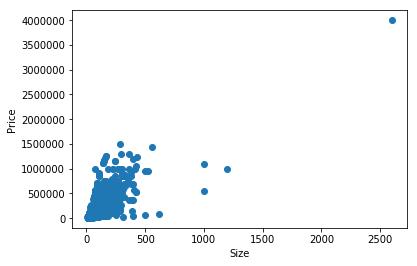

In [43]:
fig, ax = plt.subplots()
ax.scatter(x = data['size'], y = data.price)
plt.ylabel('Price')
plt.xlabel('Size')
plt.show()

In [44]:
# Looks like an outlier
data.loc[data.price>1500000]

,id,accommodation_type,address,advertiser,city,description,location,municipality,number_of_rooms,price,...,balcony,intercom,lift,parking,telephone,internet,katv,garage,basement,loggia
15394,15395,Stan,Makenzijeva,Agencija,Beograd,"Poslovna zgrada, 8 etaža, garaža sa 16 garažni...",Hram svetog Save,Opština Vračar,3,4000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [45]:
data.description[15394]

'Poslovna zgrada, 8 etaža, garaža sa 16 garažnih mesta agencijska provizija 2%'

In [46]:
# This is a business building
# Deleting outliers
data.drop([15394], inplace=True)

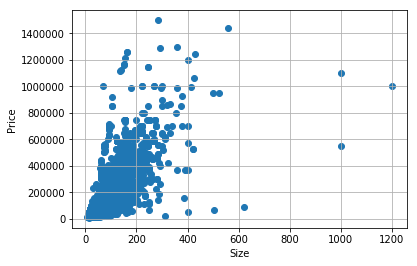

In [47]:
fig, ax = plt.subplots()
ax.scatter(x = data['size'], y = data.price)
plt.grid()
plt.ylabel('Price')
plt.xlabel('Size')
plt.show()

In [48]:
# Printing all very large appartments
data.loc[data['size']>480]

,id,accommodation_type,address,advertiser,city,description,location,municipality,number_of_rooms,price,...,balcony,intercom,lift,parking,telephone,internet,katv,garage,basement,loggia
9525,9526,Stan,Serdar Jola,Agencija,Beograd,Ultraluksuzan četvorosoban stan(ukupno 358m2; ...,Dedinje,Opština Savski venac,5+,950000.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,None
10159,10160,Stan,Hadži Prodanova,Agencija,Beograd,"(agencijska provizija 2%) Odlična zgrada, novo...",Vukov Spomenik,Opština Zvezdara,5+,1445000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11857,11858,Stan,Trebinjska,Agencija,Beograd,(agencijska provizija 2%) Poslovna zgada na V ...,Lekino brdo,Opština Voždovac,5+,1100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
11859,11860,Stan,Brankova,Agencija,Beograd,(agencijska provizija 2%) Poslovno-stambeni ob...,Brankova,Opština Savski venac,5+,950000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
12067,12068,Stan,Cara Dušana,Agencija,Beograd,"Zemun, Cara Dušana, zgrada usejena 2007. godin...",Centar,Opština Zemun,2,88000.0,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,None
16094,16095,Stan,Mokroluška,Agencija,Beograd,"Agencijski ID: 11725, pr/2, garaza, parking, d...",Medaković 2,Opština Voždovac,5+,1000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
16988,16989,Stan,Juhorkska,Agencija,Beograd,"AGENCIJSKA PROVIZIJA 2%. I/VIII, CG, stan iz o...",Karaburma,Opština Palilula,2,65000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
18006,18007,Stan,Karađorđev Trg,Agencija,Beograd,Hostel na elitnom mestu. Raspolaže sa 30 ležaj...,Kej,Opština Zemun,0.5,550000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [49]:
print(data.price[9525], data['size'][9525], data.advertisement_url[9525])
print(data.price[11857], data['size'][11857], data.advertisement_url[11857])
print(data.price[11859], data['size'][11859], data.advertisement_url[11859])
print(data.price[16094], data['size'][16094], data.advertisement_url[16094])
print(data.price[16988], data['size'][16988], data.advertisement_url[16988])
print(data.price[18006], data['size'][18006], data.advertisement_url[18006])

950000.0 523.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/diplomatska-kolonija-pametna-zgrada-ultra-lux/5425493027447?kid=1
1100000.0 1000.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/trebinjska-lekino-brdo-vozdovac-beograd-srbij/5425634830930?kid=1
950000.0 500.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/brankova-brankova-savski-venac-beograd-srbija/5425634830926?kid=1
1000000.0 1200.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/vozdovac-medakovic-mokroluska-20-0-1200m2/5425481445172?kid=1
65000.0 502.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/karaburma-juhorska-50m22t-18/5425634754210?kid=1
550000.0 1000.0 https://www.halooglasi.com/nekretnine/prodaja-stanova/hostel-na-elitnom-mestu-id100691/5425634753521?kid=1


In [50]:
# While not going that much deep in this, lets, just delete outliers
data.drop([11857], inplace=True)
data.drop([16094], inplace=True)
data.drop([18006], inplace=True)

In [51]:
data['size'][12067]

620.0

In [52]:
data.description[12067]

'Zemun, Cara Dušana, zgrada usejena 2007. godine. Stan je uknjižen od 62m2, eg, II/3. U stanu ostaju dva američka plakara, kuhinja rađena po meni i...'

In [53]:
# Changing it as in description
data['size'][12067]=62
print(data['size'][12067])

62.0


In [54]:
data.description[11859]

'(agencijska provizija 2%) Poslovno-stambeni objekat, odlična investicija, 3 lokala, 5 stambenih jedinica, garaža + 2 parking mesta.'

In [55]:
data.iloc[11859]

id                                                                    11861
accommodation_type                                                     Stan
address                                                     Mirijevsko brdo
advertiser                                                         Agencija
city                                                                Beograd
description               Jednoiposoban stan, u niskom prizemlju, nije u...
location                                                          Karaburma
municipality                                               Opština Palilula
number_of_rooms                                                         1.5
price                                                                 42500
publish_date                                                     2019-08-07
size                                                                  52.67
advertisement_id                                              5425634534378
advertisemen

In [56]:
# Removing this row because this is a business building
data.drop([11859], inplace=True)

In [57]:
print(data.description[10159])
print(data.description[11204])

(agencijska provizija 2%) Odlična zgrada, novogradnja. Penthaus, duplex, 7 i 8 sprat. U blizini 14. Gimnazije. Upotrebna dozvola iz februara 2017....
Ekstra luksuzni stanovi na prestižnoj lokaciji na Dedinju. Dostupni su četvorosobni i petosobni stanovi, kvadratura od 250 do 350m2. Sve što...


In [58]:
# Reseting index and deleting index column
data.reset_index(inplace=True)
data.drop(['index','id'], axis=1, inplace=True)

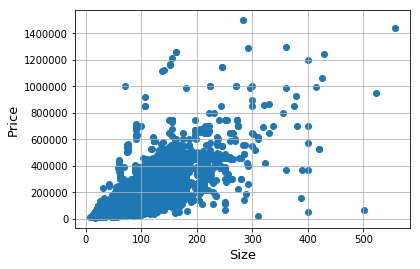

In [59]:
fig, ax = plt.subplots()
ax.scatter(x = data['size'], y = data.price)
plt.grid()
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

In [60]:
data.describe()

,price,size,total_number_of_floors,filed,pdv_return,balcony,intercom,lift,parking,telephone,internet,katv,garage,basement
count,1.825100e+04,18251.000000,17279.000000,13244.0,529.0,8853.0,1.0,7474.0,3977.0,8051.0,5313.0,5588.0,1613.0,4198.0
mean,1.213517e+05,73.970713,5.358701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,1.020958e+05,37.089582,3.941586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.500000e+03,8.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.000000e+04,50.000000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,9.200000e+04,67.000000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.450000e+05,88.000000,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.500000e+06,557.000000,30.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
# Minimum size is suspiciously small
data.loc[data['size']<15].transpose()

,4602,11724,12621,14598,15995,17722
accommodation_type,Stan,Stan,Stan,Stan,Stan,Stan
address,Oračka,DR DRAGE LJOCIC,Smiljanićeva,Francuska,Vlajkovićeva,KOD PIJACE I MAXIJA
advertiser,Agencija,Agencija,Agencija,Vlasnik,Agencija,Agencija
city,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd
description,Garsonjera se nalazi na odličnoj lokaciji u sa...,"DR DRAGE LJOCIC, PR/4, INFORMACIJA O AGENCIJSK...","Agencijski ID: 12894, 4/6, lift, uknjižen, ren...","Mini garsonjera,1 soba sa tus kabinom u centru...","Agencijski ID: 35103, psut/3, uknjižen, dobar,...",
location,Centar,Karaburma,Slavija,Dorćol,Centar,Borča
municipality,Opština Zemun,Opština Palilula,Opština Vračar,Opština Stari grad,Opština Stari grad,Opština Palilula
number_of_rooms,0.5,0.5,0.5,0.5,0.5,0.5
price,18500,14000,17000,24000,35000,11000
publish_date,2019-08-17,2019-08-08,2019-08-07,2019-08-02,2019-07-31,2019-07-29


In [62]:
# Setting correct value
data['size'][8682]=70

In [63]:
data.describe()

,price,size,total_number_of_floors,filed,pdv_return,balcony,intercom,lift,parking,telephone,internet,katv,garage,basement
count,1.825100e+04,18251.000000,17279.000000,13244.0,529.0,8853.0,1.0,7474.0,3977.0,8051.0,5313.0,5588.0,1613.0,4198.0
mean,1.213517e+05,73.970713,5.358701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,1.020958e+05,37.089582,3.941586,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.500000e+03,8.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.000000e+04,50.000000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,9.200000e+04,67.000000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.450000e+05,88.000000,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.500000e+06,557.000000,30.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [64]:
suspicious_data=data.loc[data['size']>300]
suspicious_data[['location', 'price', 'size','description','advertisement_url']]

,location,price,size,description,advertisement_url
1027,Retenzija,570000.0,401.0,"Zemun, Retenzija - Aleksandra Dubčeka 401m2 vi...",https://www.halooglasi.com/nekretnine/prodaja-...
1673,Centar,640500.0,302.0,"U centru grada, na Gornjem Dorćolu, prodaje se...",https://www.halooglasi.com/nekretnine/prodaja-...
2704,Slavija,870000.0,330.0,"Jedinstvena nekretnina u rezidencijalnoj zoni,...",https://www.halooglasi.com/nekretnine/prodaja-...
2883,Kalenić pijaca,1062500.0,425.0,"6,0, Vracar, Kalenic, 425m2 (335m2+galerija 90...",https://www.halooglasi.com/nekretnine/prodaja-...
2884,Voždovačka crkva,620000.0,310.0,"5,0 Vozdovac, Generala Anrija, najlepsi deo Vo...",https://www.halooglasi.com/nekretnine/prodaja-...
3095,Jove Ilića,600000.0,310.0,Stan se nalazi u najluksuznijem delu Vozdovca ...,https://www.halooglasi.com/nekretnine/prodaja-...
3685,Meljak,53000.0,400.0,Kucana dobroj lokaciji. Blizina Robne kuce S...,https://www.halooglasi.com/nekretnine/prodaja-...
4806,Krunska,1247000.0,430.0,"Ovaj prekrasni, prostran i moderno uređen pent...",https://www.halooglasi.com/nekretnine/prodaja-...
5149,Trošarina,690000.0,320.0,"Vojvode Stepe, 7/8, lift ulazi u stan, dve vel...",https://www.halooglasi.com/nekretnine/prodaja-...
6035,Hram svetog Save,925000.0,378.0,"Luksuzan, potpuno nov, neuseljavan penthaus na...",https://www.halooglasi.com/nekretnine/prodaja-...


In [65]:
data.drop([1027], inplace=True) # This is a house, not an appartment
data.drop([2704], inplace=True) # This is a house, not an appartment
data.drop([3685], inplace=True) # This is a house, not an appartment
data.drop([14500], inplace=True) # This is a house, not an appartment
data.drop([17021], inplace=True) # This is a house, not an appartment
data.drop([17403], inplace=True) # Not sure if they are selling apartmenton on first floor or whole building

In [66]:
data.isnull().sum()

accommodation_type            0
address                       0
advertiser                    0
city                          0
description                   0
location                      0
municipality                  0
number_of_rooms               0
price                         0
publish_date                  0
size                          0
advertisement_id              0
advertisement_url             0
heating                     777
floor                       420
total_number_of_floors      972
object_type                5929
filed                      5004
pdv_return                17716
balcony                    9396
intercom                  18244
lift                      10772
parking                   14271
telephone                 10197
internet                  12934
katv                      12660
garage                    16633
basement                  14049
loggia                    18245
dtype: int64

Ok, done with this. What is the most often sale price of the apartments?

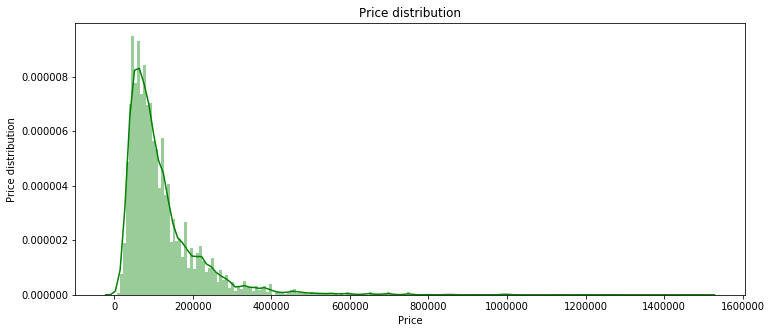

In [67]:
plt.figure(figsize = (12,5))
sns.distplot(data.price, bins=200, color='Green')
plt.title('Price distribution')
plt.ylabel('Price distribution')
plt.xlabel('Price')
plt.show()

In [68]:
# The most often price amount
price_count=data.groupby('price').price.count()
price_count.sort_values(ascending=False).head(10)

price
75000.0     258
85000.0     233
65000.0     226
110000.0    222
125000.0    220
120000.0    206
135000.0    192
95000.0     187
80000.0     174
45000.0     172
Name: price, dtype: int64

What is the most often size of apartments on sale?

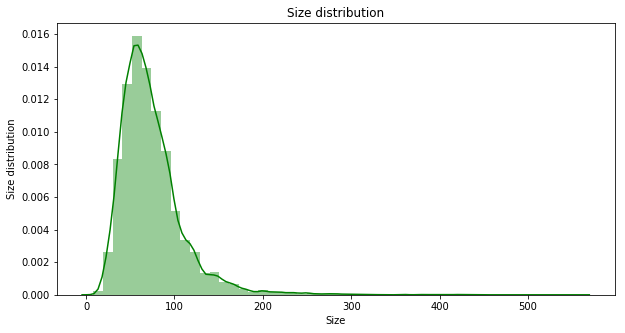

In [69]:
plt.figure(figsize = (10,5))
sns.distplot(data['size'], color='Green')
plt.title('Size distribution')
plt.ylabel('Size distribution')
plt.xlabel('Size')
plt.show()

In [70]:
# The most often apartment size
app_size_count=data.groupby('size').price.count()
app_size_count.sort_values(ascending=False).head(10)

size
70.0    380
60.0    362
65.0    357
55.0    331
50.0    319
54.0    319
52.0    310
56.0    302
75.0    300
45.0    293
Name: price, dtype: int64

Number of apartments on sale per Municipality.

municipality
Opština Zvezdara        2983
Opština Voždovac        2105
Opština Vračar          2087
Opština Palilula        2061
Opština Novi Beograd    1854
Opština Stari grad      1486
Opština Savski venac    1399
Opština Zemun           1375
Opština Čukarica        1365
Opština Rakovica        1296
Name: municipality, dtype: int64


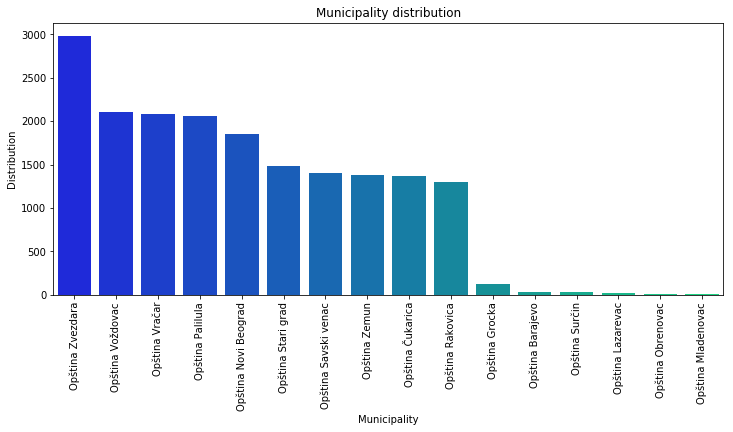

In [71]:
# Number of apartments on sale per Municipality

mun_count=data.groupby('municipality').municipality.count().sort_values(ascending=False)
print(mun_count.head(10))

plt.figure(figsize = (12,5))
sns.barplot(x=mun_count.index, y=mun_count.values, palette='winter')
plt.title('Municipality distribution')
plt.ylabel('Distribution')
plt.xlabel('Municipality')
plt.xticks(rotation=90)
plt.show()

Number of apartments on sale per location

location
Mirijevo           1168
Centar              957
Karaburma           453
Kalenić pijaca      430
Banovo brdo         424
Dorćol              395
Beograd na vodi     375
Borča               370
Braće Jerković      359
Dedinje             329
Name: location, dtype: int64


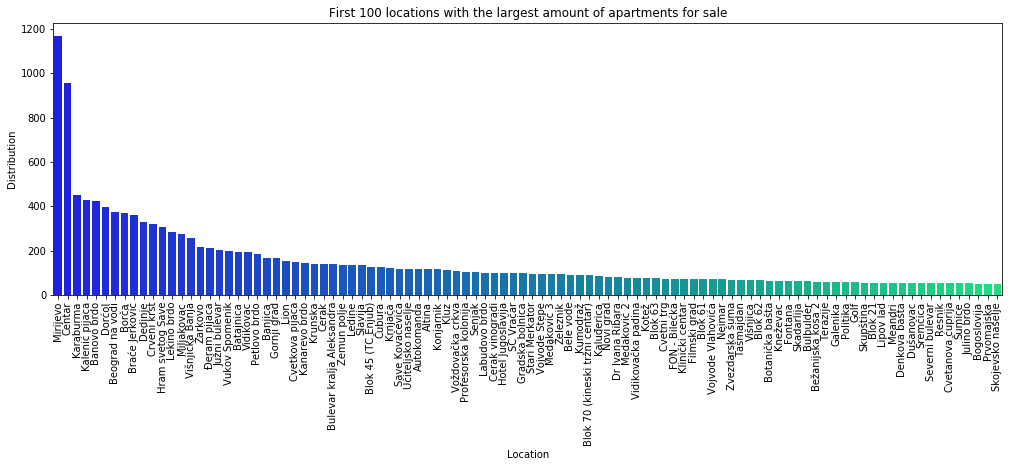

In [72]:
# Number of apartments on sale per location

loc_count=data.groupby('location').location.count().sort_values(ascending=False).head(100)
print(loc_count.head(10))

plt.figure(figsize = (17,5))
sns.barplot(x=loc_count.index, y=loc_count.values, palette='winter')
plt.title('First 100 locations with the largest amount of apartments for sale')
plt.ylabel('Distribution')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.show()

advertiser
Agencija      17674
Vlasnik         433
Investitor      136
Banka             2
Name: location, dtype: int64


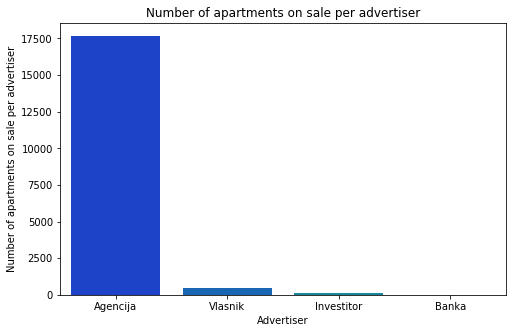

In [73]:
# Number of apartments on sale per advertiser
# Čittle bit of translation:  Agencija = Agency, Vlasnik = Proprietor, Investitor = Investor, Banka = Bank

advertiser_count=data.groupby('advertiser').location.count().sort_values(ascending=False).head(100)
print(advertiser_count.head(10))

plt.figure(figsize = (8,5))
sns.barplot(x=advertiser_count.index, y=advertiser_count.values, palette='winter')
plt.title('Number of apartments on sale per advertiser')
plt.ylabel('Number of apartments on sale per advertiser')
plt.xlabel('Advertiser')
plt.show()

Most common number of rooms in apartments for sale

number_of_rooms
3      4077
2      3746
2.5    2707
4      2112
1.5    1922
3.5    1351
1       933
5+      506
0.5     405
5       279
4.5     207
Name: number_of_rooms, dtype: int64


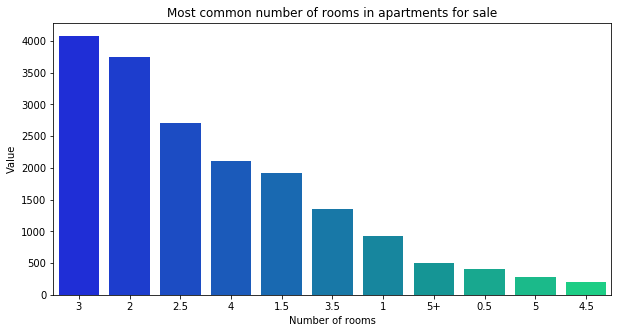

In [74]:
# Most common number of rooms in apartments for sale
# Completely useless information but I'm interested in

rooms_count=data.groupby('number_of_rooms').number_of_rooms.count().sort_values(ascending=False).head(100)
print(rooms_count)

plt.figure(figsize = (10,5))
sns.barplot(x=rooms_count.index, y=rooms_count.values, palette='winter')
plt.title('Most common number of rooms in apartments for sale')
plt.ylabel('Value')
plt.xlabel('Number of rooms')
plt.show()

So, 3 rooms apartments are most often on sale. Cool. But the thing that everybody wants is to know what's with the high prices?? Let's see average price per m2 per municipality and location.

In [75]:
price_per_m2 =(data.price)/(data['size'])
data['price_per_m2'] = price_per_m2

In [76]:
data.describe()

,price,size,total_number_of_floors,filed,pdv_return,balcony,intercom,lift,parking,telephone,internet,katv,garage,basement,price_per_m2
count,1.824500e+04,18245.000000,17273.000000,13241.0,529.0,8849.0,1.0,7473.0,3974.0,8048.0,5311.0,5585.0,1612.0,4196.0,18245.000000
mean,1.212943e+05,73.917264,5.359636,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1570.861184
std,1.019052e+05,36.886182,3.941574,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,738.064285
min,6.500000e+03,8.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.741935
25%,6.000000e+04,50.000000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1045.348837
50%,9.200000e+04,67.000000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1409.090909
75%,1.450000e+05,88.000000,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1913.461538
max,1.500000e+06,557.000000,30.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14285.714286


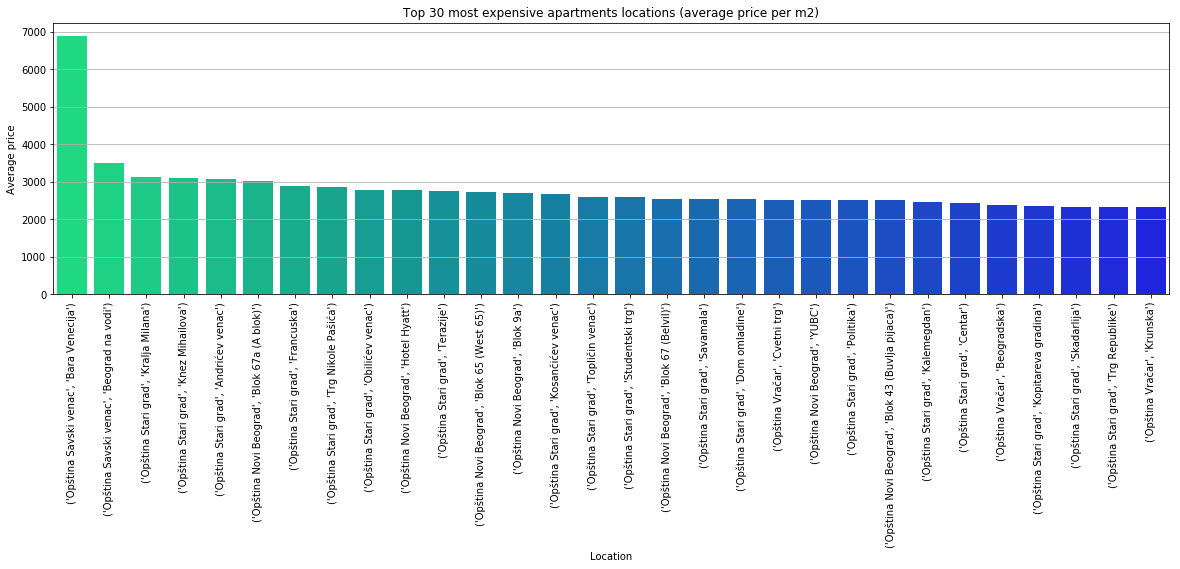

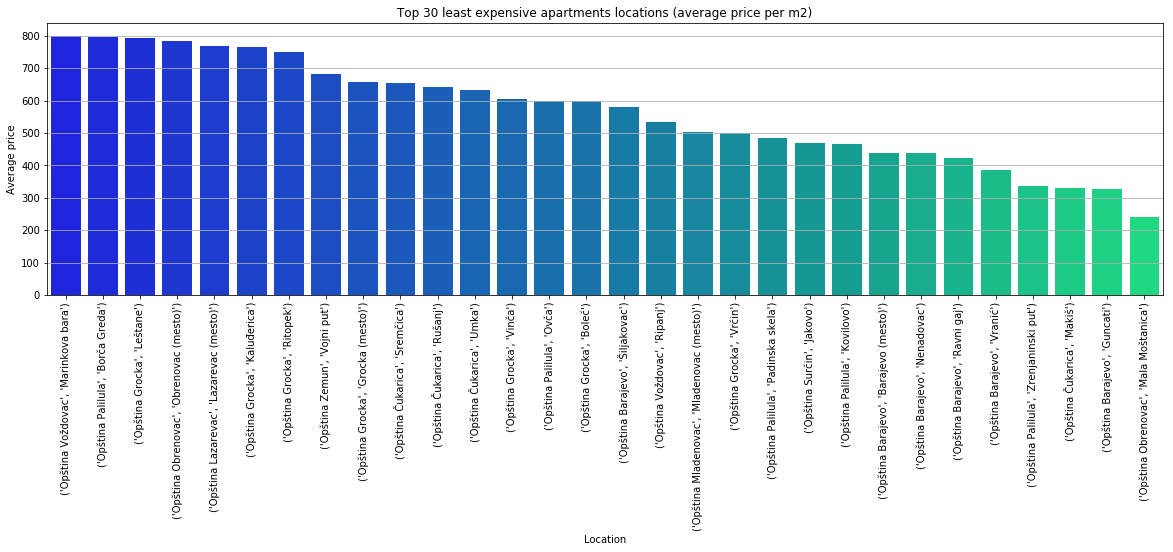

In [77]:
# Average price per location 

price_columns= data[['municipality','location', 'price_per_m2']]
price_data=price_columns.groupby(['municipality','location']).mean()
avg_prices=price_data.sort_values(by='price_per_m2', ascending=False)
for_arrogantly_rich=avg_prices.head(30)
for_huckster_saver=avg_prices.tail(30)


plt.figure(figsize = (20,5))
plt.grid()
sns.barplot(x=for_arrogantly_rich.index, y=for_arrogantly_rich.price_per_m2, palette="winter_r")
plt.title('Top 30 most expensive apartments locations (average price per m2)')
plt.ylabel('Average price')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (20,5))
plt.grid()
sns.barplot(x=for_huckster_saver.index, y=for_huckster_saver.price_per_m2, palette="winter")
plt.title('Top 30 least expensive apartments locations (average price per m2)')
plt.ylabel('Average price')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.show()

I am interested in apartments in Novi Beograd, so I will aim all queries to this municipality.

In [78]:
# Average price per location in Novi Beograd

price_columns= data[['municipality','location', 'price_per_m2']]
price_data=price_columns.groupby(['municipality','location']).mean()
nbg_avg_prices=price_data.loc['Opština Novi Beograd']
nbg_avg_prices=nbg_avg_prices.sort_values(by='price_per_m2', ascending=False)
print('15 locations with lowest average price per appartment: \n',nbg_avg_prices.tail(15))



15 locations with lowest average price per appartment: 
                                 price_per_m2
location                                    
Blok 37                          1583.959575
Blok 38                          1576.336104
Blok 45 (TC Enjub)               1553.054026
Blok 37a                         1541.478873
Blok 70 (kineski tržni centar)   1501.327430
Bežanijska kosa 1                1464.557218
Blok 61                          1464.418514
Bežanijska kosa 2                1412.463570
Blok 62                          1399.535891
Blok 44 (TC Piramida)            1395.901920
Blok 63                          1336.534686
Dr Ivana Ribara                  1307.248463
Bežanijska kosa 3                1306.409303
Stara Bežanija                   1158.895546
Ledine                           1039.441951


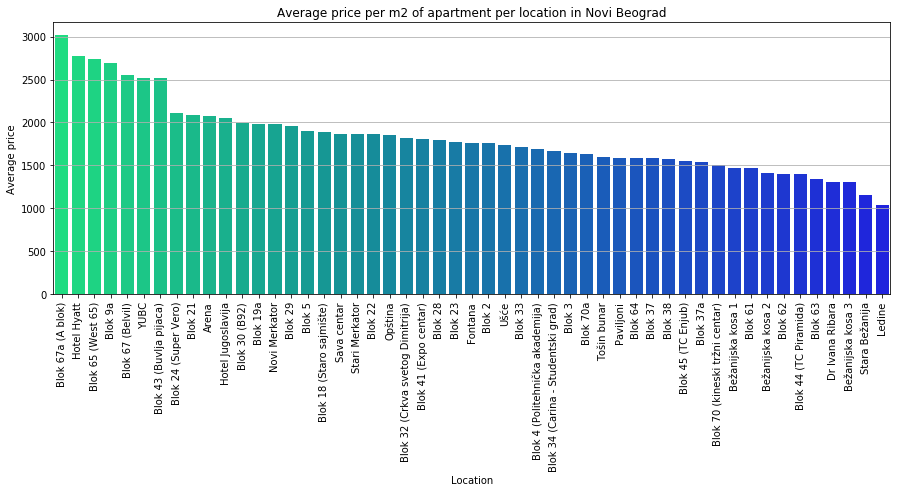

In [79]:
plt.figure(figsize = (15,5))
plt.grid()
sns.barplot(x=nbg_avg_prices.index, y=nbg_avg_prices.price_per_m2, palette="winter_r")
plt.title('Average price per m2 of apartment per location in Novi Beograd')
plt.ylabel('Average price')
plt.xlabel('Location')
plt.xticks(rotation=90)

plt.show()

Let's say that I have a wealthy fairy godmother from Bankland that is planning to give me a 100000EUR for my upcoming birthday. 

In [80]:
# Finding all apartments that cost under 100000EUR
affordable_appartments = data[data.price<=100000]
print(affordable_appartments.shape)
affordable_appartments.head()

(10241, 30)


,accommodation_type,address,advertiser,city,description,location,municipality,number_of_rooms,price,publish_date,...,intercom,lift,parking,telephone,internet,katv,garage,basement,loggia,price_per_m2
11,Stan,Paunova,Agencija,Beograd,"Izuzetan, lux poslovno-stambeni objekat u izgr...",Banjica,Opština Voždovac,2.5,99400.0,2019-08-22,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,None,1400.000000
13,Stan,Bulevar Zorana Đinđića,Agencija,Beograd,"Kompletno renoviran, lepo sređen stan, pvc sto...",Blok 33,Opština Novi Beograd,1,72000.0,2019-08-22,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,None,2057.142857
16,Stan,Ilije Stojadinovića,Agencija,Beograd,"Predmetni stan se nalazi na odličnoj lokaciji,...",Filmski grad,Opština Čukarica,0.5,42000.0,2019-08-22,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,None,1500.000000
20,Stan,Ismeta Mujezinovića,Agencija,Beograd,Stan se nalazi u ulici Ismeta Mujazinovića na ...,Bežanijska kosa 2,Opština Novi Beograd,2,95000.0,2019-08-22,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,None,1357.142857
24,Stan,Nehruova,Agencija,Beograd,"U prilici smo da vam ponudimo stan u bloku 62,...",Blok 62,Opština Novi Beograd,1.5,69000.0,2019-08-22,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,None,1533.333333


location
Mirijevo           1112
Karaburma           430
Borča               367
Centar              334
Braće Jerković      321
Miljakovac          266
Banovo brdo         257
Višnjička Banja     233
Batajnica           193
Žarkovo             183
Name: location, dtype: int64


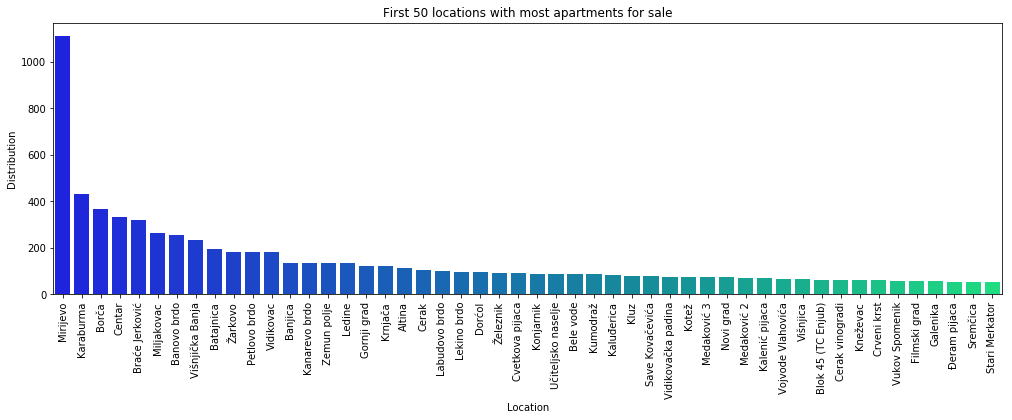

In [81]:
# Number of apartments for sale per location
loc_count=affordable_appartments.groupby('location').location.count().sort_values(ascending=False).head(50)
print(loc_count.head(10))

plt.figure(figsize = (17,5))
sns.barplot(x=loc_count.index, y=loc_count.values, palette='winter')
plt.title('First 50 locations with most apartments for sale')
plt.ylabel('Distribution')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.show()

New Belgrade here I come.

In [82]:
# Number of apartments for sale per location in municipality Novi Beograd
nbg_count=affordable_appartments.groupby(['municipality','location']).location.count()
nbg_count['Opština Novi Beograd'].sort_values(ascending=False).head(20)

location
Ledine                             133
Blok 45 (TC Enjub)                  62
Stari Merkator                      53
Blok 62                             52
Fontana                             45
Dr Ivana Ribara                     43
Blok 63                             38
Paviljoni                           37
Bežanijska kosa 3                   32
Bežanijska kosa 2                   29
Blok 61                             29
Blok 70 (kineski tržni centar)      29
Blok 4 (Politehnička akademija)     22
Bežanijska kosa 1                   21
Blok 64                             21
Stara Bežanija                      14
Blok 44 (TC Piramida)               13
Blok 37                             11
Hotel Jugoslavija                   10
Blok 3                              10
Name: location, dtype: int64

There is a lot of apartments for sale in Ledine. What is the lowest apartment average price in Novi Beograd?

In [83]:
# Average price for apartments per location in Novi Beograd
price_columns= affordable_appartments[['municipality','location', 'price_per_m2']]
price_data=price_columns.groupby(['municipality','location']).mean()
nbg_avg_prices=price_data.loc['Opština Novi Beograd']
nbg_avg_prices=nbg_avg_prices.sort_values(by='price_per_m2', ascending=False)
print('15 locations with lowest average price per appartment: \n',nbg_avg_prices.tail(15))

15 locations with lowest average price per appartment: 
                                     price_per_m2
location                                        
Blok 19a                             1424.591924
Blok 37                              1420.453032
Blok 64                              1411.253684
Blok 62                              1393.746642
Blok 45 (TC Enjub)                   1388.807805
Blok 34 (Carina - Studentski grad)   1378.977157
Bežanijska kosa 1                    1378.047060
Blok 61                              1356.770072
Blok 44 (TC Piramida)                1340.699360
Bežanijska kosa 2                    1336.060643
Bežanijska kosa 3                    1280.963332
Dr Ivana Ribara                      1248.398054
Stara Bežanija                       1229.712748
Blok 63                              1220.887014
Ledine                               1045.210888


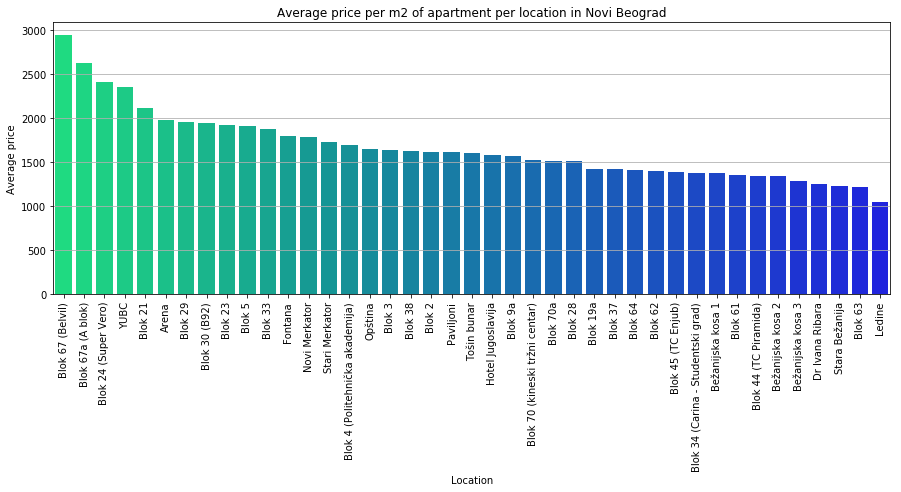

In [84]:
plt.figure(figsize = (15,5))
plt.grid()
sns.barplot(x=nbg_avg_prices.index, y=nbg_avg_prices.price_per_m2, palette="winter_r")
plt.title('Average price per m2 of apartment per location in Novi Beograd')
plt.ylabel('Average price')
plt.xlabel('Location')
plt.xticks(rotation=90)

plt.show()

**The allegedly affordable apartments in New Belgrade and their average price**

In [85]:
# Apartments for sale in Novi Beograd that costs under 100000EUR
nbg_affordable=affordable_appartments.loc[affordable_appartments.municipality=='Opština Novi Beograd']
print(nbg_affordable.shape)
nbg_affordable.head()

(803, 30)


,accommodation_type,address,advertiser,city,description,location,municipality,number_of_rooms,price,publish_date,...,intercom,lift,parking,telephone,internet,katv,garage,basement,loggia,price_per_m2
13,Stan,Bulevar Zorana Đinđića,Agencija,Beograd,"Kompletno renoviran, lepo sređen stan, pvc sto...",Blok 33,Opština Novi Beograd,1,72000.0,2019-08-22,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,None,2057.142857
20,Stan,Ismeta Mujezinovića,Agencija,Beograd,Stan se nalazi u ulici Ismeta Mujazinovića na ...,Bežanijska kosa 2,Opština Novi Beograd,2,95000.0,2019-08-22,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,None,1357.142857
24,Stan,Nehruova,Agencija,Beograd,"U prilici smo da vam ponudimo stan u bloku 62,...",Blok 62,Opština Novi Beograd,1.5,69000.0,2019-08-22,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,None,1533.333333
76,Stan,Uroša Martinovića,Agencija,Beograd,Retko u ponudi. Stan se nalazi na trenutno jed...,Blok 67a (A blok),Opština Novi Beograd,1.5,100000.0,2019-08-17,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,None,2564.102564
82,Stan,Dr Ivana Ribara,Agencija,Beograd,"U mirnom delu Bloka 45, u neposrednoj blizini ...",Blok 45 (TC Enjub),Opština Novi Beograd,2,80000.0,2019-08-16,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,None,1230.769231


In [86]:
# Number of apartmetns for sale in Novi Beograd under 100000EUR per location
nbg_count=nbg_affordable.groupby(['municipality','location']).location.count()
nbg_count['Opština Novi Beograd'].sort_values(ascending=False).head(20)

location
Ledine                             133
Blok 45 (TC Enjub)                  62
Stari Merkator                      53
Blok 62                             52
Fontana                             45
Dr Ivana Ribara                     43
Blok 63                             38
Paviljoni                           37
Bežanijska kosa 3                   32
Bežanijska kosa 2                   29
Blok 61                             29
Blok 70 (kineski tržni centar)      29
Blok 4 (Politehnička akademija)     22
Bežanijska kosa 1                   21
Blok 64                             21
Stara Bežanija                      14
Blok 44 (TC Piramida)               13
Blok 37                             11
Hotel Jugoslavija                   10
Blok 3                              10
Name: location, dtype: int64

Ledine is not location I am interested in. It will be removed from my query.

In [87]:
nbg_affordable=nbg_affordable.loc[nbg_affordable.location!='Ledine']
print(nbg_affordable.shape)
nbg_affordable.groupby(['location']).location.count().sort_values(ascending=False)

(670, 30)


location
Blok 45 (TC Enjub)                    62
Stari Merkator                        53
Blok 62                               52
Fontana                               45
Dr Ivana Ribara                       43
Blok 63                               38
Paviljoni                             37
Bežanijska kosa 3                     32
Bežanijska kosa 2                     29
Blok 70 (kineski tržni centar)        29
Blok 61                               29
Blok 4 (Politehnička akademija)       22
Bežanijska kosa 1                     21
Blok 64                               21
Stara Bežanija                        14
Blok 44 (TC Piramida)                 13
Blok 37                               11
Blok 3                                10
Hotel Jugoslavija                     10
Blok 2                                 9
Blok 29                                9
Opština                                9
Blok 24 (Super Vero)                   8
Tošin bunar                            7
Blok 67

I would be satisfied with 2.5, 3 or 3.5 rooms apartments, so I'll crank out the query just for those.

In [88]:
nbg_affordable.number_of_rooms.unique()

array([1, 2, 1.5, 2.5, 3.5, 3, 0.5, 4, '5+', 5], dtype=object)

In [89]:
nbg_rooms=nbg_affordable.loc[nbg_affordable.number_of_rooms.isin([2.5,3.5, 3])]
nbg_rooms.shape

(219, 30)

In [90]:
nbg_rooms.groupby(['location']).location.count().sort_values(ascending=False)

location
Stari Merkator                        21
Blok 62                               20
Blok 63                               18
Dr Ivana Ribara                       16
Blok 45 (TC Enjub)                    15
Stara Bežanija                        13
Bežanijska kosa 2                     13
Blok 61                               13
Bežanijska kosa 1                     12
Paviljoni                              9
Bežanijska kosa 3                      7
Blok 44 (TC Piramida)                  6
Blok 29                                6
Fontana                                6
Blok 37                                5
Blok 34 (Carina - Studentski grad)     5
Blok 70 (kineski tržni centar)         4
Hotel Jugoslavija                      4
Blok 2                                 4
Blok 28                                3
Blok 70a                               3
Blok 4 (Politehnička akademija)        3
Blok 64                                3
Tošin bunar                            2
Blok 3 

The penthouse is fine, but cleaning ladies are expensive. Size of apartments can go from 45km2 to 75km2.

In [91]:
nbg_aff_rooms_size=nbg_rooms.loc[(nbg_rooms['size']>=45) & (nbg_rooms['size']<=75)]
nbg_aff_rooms_size.shape

(174, 30)

In [92]:
nbg_aff_rooms_size.floor.unique()

array(['6', None, '17', '7', '4', '11', '9', 'PR', '10', '1', '8', '2',
       '3', 'VPR', '5', '13', '20', 'SUT', '14', '19', '15', 'PSUT'],
      dtype=object)

PR, VPR,SUT,PSUT are all ground floors (or below) and I am not interested in those apartments, as in last floor apartments.

In [93]:
# No ground floor
nbg_aff_rooms_size=nbg_aff_rooms_size.loc[(nbg_aff_rooms_size.floor!=None) &(nbg_aff_rooms_size.floor!='PR')&(nbg_aff_rooms_size.floor!='VPR')&(nbg_aff_rooms_size.floor!='SUT')&(nbg_aff_rooms_size.floor!='PSUT')]

In [94]:
nbg_aff_rooms_size.floor.unique()

array(['6', None, '17', '7', '4', '11', '9', '10', '1', '8', '2', '3',
       '5', '13', '20', '14', '19', '15'], dtype=object)

In [95]:
nbg_aff_rooms_size.total_number_of_floors.unique()

array([ 6., nan, 18.,  7.,  4., 16.,  9., 14., 12., 19., 17.,  3., 11.,
        8., 20.,  2.,  5., 10., 30., 15., 13.])

In [96]:
# Changing floor to float
nbg_aff_rooms_size.floor=nbg_aff_rooms_size.floor.astype(float)

In [97]:
nbg_aff_rooms_size.floor.unique()

array([ 6., nan, 17.,  7.,  4., 11.,  9., 10.,  1.,  8.,  2.,  3.,  5.,
       13., 20., 14., 19., 15.])

In [98]:
# No last floor    
nbg_aff_rooms_size = nbg_aff_rooms_size.loc[nbg_aff_rooms_size.floor!=nbg_aff_rooms_size.total_number_of_floors]

In [99]:
nbg_aff_rooms_size.groupby(['location']).location.count().sort_values(ascending=False)

location
Blok 62                            12
Stari Merkator                      9
Paviljoni                           7
Blok 61                             7
Blok 63                             7
Blok 29                             6
Bežanijska kosa 1                   5
Bežanijska kosa 2                   5
Blok 2                              3
Blok 45 (TC Enjub)                  3
Dr Ivana Ribara                     3
Fontana                             3
Blok 37                             2
Stara Bežanija                      2
Blok 64                             1
Blok 70a                            1
Blok 44 (TC Piramida)               1
Blok 4 (Politehnička akademija)     1
Blok 33                             1
Blok 28                             1
Bežanijska kosa 3                   1
Tošin bunar                         1
Name: location, dtype: int64

In [100]:
nbg_aff_rooms_size.shape

(82, 30)

In [101]:
# Reseting index and deleting index column
nbg_aff_rooms_size.reset_index(inplace=True)
nbg_aff_rooms_size.drop(['index'], axis=1, inplace=True)

In [102]:
nbg_aff_rooms_size.head()

,accommodation_type,address,advertiser,city,description,location,municipality,number_of_rooms,price,publish_date,...,intercom,lift,parking,telephone,internet,katv,garage,basement,loggia,price_per_m2
0,Stan,,Agencija,Beograd,"Blok 70A Dvoiposoban stan, površine 71 kvm, ...",Blok 70a,Opština Novi Beograd,2.5,99000.0,2019-08-22,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,None,1394.366197
1,Stan,Nehruova,Agencija,Beograd,AGENCIJSKA PROVIZIJA 2%. OPIS NEKRETNINE: Prod...,Blok 62,Opština Novi Beograd,2.5,79900.0,2019-08-21,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,None,1210.606061
2,Stan,Otona Zupancica,Agencija,Beograd,2.5 stan na savrsenoj lokaciji na Novom Beogra...,Fontana,Opština Novi Beograd,2.5,97000.0,2019-08-20,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,None,1616.666667
3,Stan,Otona Zupancica,Agencija,Beograd,"KOMPLETNO RENOVIRAN izvorno 2.0, adaptiran u 2...",Stari Merkator,Opština Novi Beograd,2.5,98000.0,2019-08-20,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,None,1884.615385
4,Stan,Jurija Gagarina,Agencija,Beograd,Stan se nalazi u bloku 63 na desetom spratu st...,Blok 63,Opština Novi Beograd,2.5,90000.0,2019-08-09,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,None,1363.636364


There are 82 suitable apartments. 

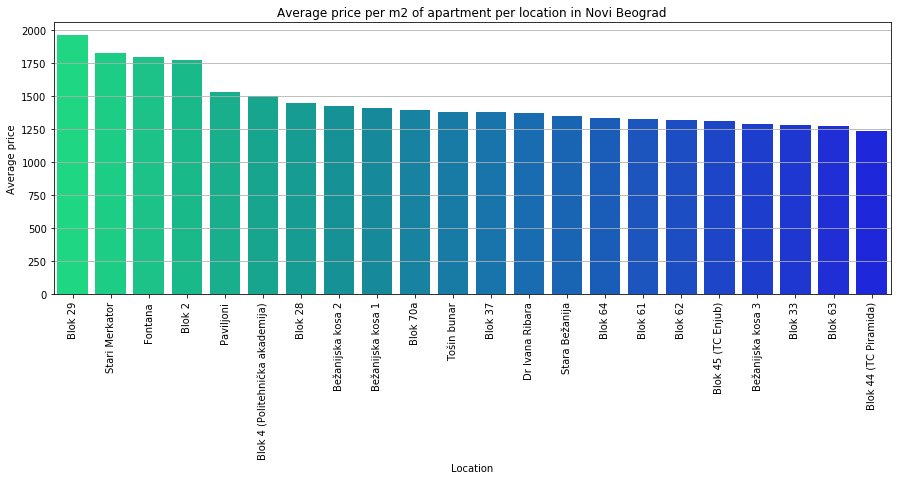

In [103]:
price_columns= nbg_aff_rooms_size[['municipality','location', 'price_per_m2']]
price_data=price_columns.groupby(['municipality','location']).mean()
nbg_avg_prices=price_data.loc['Opština Novi Beograd']
nbg_avg_prices=nbg_avg_prices.sort_values(by='price_per_m2', ascending=False)

plt.figure(figsize = (15,5))
plt.grid()
sns.barplot(x=nbg_avg_prices.index, y=nbg_avg_prices.price_per_m2, palette="winter_r")
plt.title('Average price per m2 of apartment per location in Novi Beograd')
plt.ylabel('Average price')
plt.xlabel('Location')
plt.xticks(rotation=90)

plt.show()

In [104]:
nbg_aff_rooms_size.loc[(nbg_aff_rooms_size.location=='Blok 70a') | (nbg_aff_rooms_size.location=='Dr Ivana Ribara')].transpose()

,0,13,28,56
accommodation_type,Stan,Stan,Stan,Stan
address,,Dr Ivana Ribara,Dr Ivana Ribara,Dr Ivana Ribara
advertiser,Agencija,Agencija,Agencija,Agencija
city,Beograd,Beograd,Beograd,Beograd
description,"Blok 70A Dvoiposoban stan, površine 71 kvm, ...",AGENCIJSKA PROVIZIJA 2%. OPIS NEKRETNINE: odli...,Lep dvoiposoban komforan stan u izvornom stanj...,"2,5 stan u najlepšem delu bloka, duplex. Blizu..."
location,Blok 70a,Dr Ivana Ribara,Dr Ivana Ribara,Dr Ivana Ribara
municipality,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd
number_of_rooms,2.5,2.5,2.5,2.5
price,99000,100000,100000,88900
publish_date,2019-08-22,2019-07-24,2019-08-17,2019-08-08


In [105]:
nbg_aff_rooms_size.loc[(nbg_aff_rooms_size.location=='Blok 62')].transpose()

,1,5,16,17,18,19,40,42,47,66,67,73
accommodation_type,Stan,Stan,Stan,Stan,Stan,Stan,Stan,Stan,Stan,Stan,Stan,Stan
address,Nehruova,Jurija Gagarina,nehruova,nehruova,Jurija Gagarina,Jurija Gagarina,Jurija Gagarina,Dušana Vukasovića,nehruova,Nehruova,,Jurija Gagarina
advertiser,Agencija,Agencija,Agencija,Agencija,Agencija,Vlasnik,Agencija,Agencija,Agencija,Agencija,Agencija,Agencija
city,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd,Beograd
description,AGENCIJSKA PROVIZIJA 2%. OPIS NEKRETNINE: Prod...,"Odličan, sređen 2.5 stan zapadne orijentacije ...","adaptibilan u 3,5......bo;ni prozor","bočni prozor !!!...adaptibilan u 3,5..u izvorn...",(agencijska provizija 2%) Uknjižen stan u zgra...,"Stan je u odličnom stanju, ne zahteva dodatna ...","Novi Beograd, Blok 62 - Jurija Gagarina 72m2 2...","Novi Beograd, Blok 62, Dušana Vukasovića, uknj...","vojna zgrada..bočni prozor...adaptibilan u 3,5","Izvorno trosoban stan, pregrađivanjem kuhinje ...","Stan za svaku preporuku. Odrzavana, uredna zgr...","Dvoiposoban stan sa odličnim rasporedom, održa..."
location,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62,Blok 62
municipality,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd,Opština Novi Beograd
number_of_rooms,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,3.5,2.5,2.5
price,79900,95500,98500,99000,91000,95000,96000,95000,98000,99000,95000,95000
publish_date,2019-08-21,2019-08-22,2019-08-20,2019-08-01,2019-08-20,2019-08-19,2019-08-15,2019-08-14,2019-08-12,2019-08-05,2019-08-04,2019-08-01


OK. Only thing left is to choose one. ;) 

The next part is serious and I'm trying to apply machine learning regression algorithms to predict the cost of apartments in Belgrade based on the information I can get from the Halo Oglasi site.